In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
#REGIONS OF INTEREST BASED ON dStruct
#Start	Stop	pval	FDR
#1113	1132	0.000604629516601562	0.381496031628333
#9889	9902	0.0008544921875	0.381496031628333
#10051	10061	0.0009765625	0.381496031628333
#16082	16098	0.00014495849609375	0.317024230957031
#17031	17047	0.00104662834465935	0.381496031628333
#17741	17751	0.0009765625	0.381496031628333

In [3]:
#Getting region 16082	16098 for DIFF BUM HMM OUTPUT 
df_diff_bumhmm_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Xist_in vivo_vs_ex vivo_new_data_october_diff_BUM_HMM_analysed.txt', sep="\t", header=0)
df_diff_bumhmm_output = df_diff_bumhmm_output.iloc [16081:16098, 1:3]

#df_diff_bumhmm_output= df_diff_bumhmm_output.iloc[0:10, :]

df_diff_bumhmm_output.head

<bound method NDFrame.head of                  UM            MU
16082  2.015341e-11  2.778370e-22
16083  1.809466e-30  7.090855e-35
16084  9.309652e-14  1.503866e-16
16085  9.144186e-40  6.062040e-28
16086  8.960614e-28  9.753335e-29
16087  5.205579e-36  8.845232e-29
16088  5.405124e-29  1.033709e-40
16089  2.433699e-28  7.344147e-29
16090  7.941859e-22  5.659064e-18
16091  1.283024e-14  1.748755e-15
16092  2.283159e-39  9.398121e-34
16093  1.140692e-08  5.845161e-10
16094  3.034225e-16  1.747166e-23
16095  1.975800e-44  6.608289e-34
16096  4.596604e-27  5.249467e-31
16097  1.786026e-27  2.508572e-30
16098  1.692743e-40  5.958146e-20>

In [4]:
#Getting region 16082	16098 FOR dStruct analysis

df_pea_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/output_dStruct_Xist_new_data_reac_table.txt', sep="\t", header=0)
df_pea_output = df_pea_output.iloc[16081:16098, 1:3]
df_pea_output= df_pea_output.rename_axis('positions').reset_index()
#df_pea_output = df_pea_output.iloc[0:10, :]
df_pea_output.head

<bound method NDFrame.head of     positions        A2        B1
0       16082  0.000000  0.104781
1       16083  1.333134  0.866639
2       16084  0.524476  0.289116
3       16085  0.000000  0.072807
4       16086  0.000000  0.181925
5       16087  0.159078  0.130052
6       16088  0.043348  0.227361
7       16089  0.000000  0.263776
8       16090  0.086021  0.422255
9       16091  0.224042  0.031939
10      16092  0.766678  0.757222
11      16093  0.855428  0.024680
12      16094  0.000000  0.152060
13      16095  0.265450  0.618169
14      16096  3.019725  1.667177
15      16097  0.154910  0.065857
16      16098  0.270982  0.372445>

In [5]:
new_df = df_pea_output.set_index('positions').join(df_diff_bumhmm_output)
new_df.head

<bound method NDFrame.head of                  A2        B1            UM            MU
positions                                                
16082      0.000000  0.104781  2.015341e-11  2.778370e-22
16083      1.333134  0.866639  1.809466e-30  7.090855e-35
16084      0.524476  0.289116  9.309652e-14  1.503866e-16
16085      0.000000  0.072807  9.144186e-40  6.062040e-28
16086      0.000000  0.181925  8.960614e-28  9.753335e-29
16087      0.159078  0.130052  5.205579e-36  8.845232e-29
16088      0.043348  0.227361  5.405124e-29  1.033709e-40
16089      0.000000  0.263776  2.433699e-28  7.344147e-29
16090      0.086021  0.422255  7.941859e-22  5.659064e-18
16091      0.224042  0.031939  1.283024e-14  1.748755e-15
16092      0.766678  0.757222  2.283159e-39  9.398121e-34
16093      0.855428  0.024680  1.140692e-08  5.845161e-10
16094      0.000000  0.152060  3.034225e-16  1.747166e-23
16095      0.265450  0.618169  1.975800e-44  6.608289e-34
16096      3.019725  1.667177  4.596604e-2

In [6]:
#THRESHOLDING DIFF BUM HMM OUTPUT
new_df['UM'] = [0 if x<0.05 else x for x in new_df['UM']]
new_df['MU'] = [0 if x<0.05 else x for x in new_df['MU']]

In [7]:
#print(new_df.columns)
new_df = new_df[['MU', 'UM','A2','B1']]
#print(new_df.columns)

new_df.columns = ['more flexible in cell - DIFF BUM HMM', 'more flexible ex vivo - DIFF BUM HMM','in cell - dStruct', 'ex vivo - dStruct'  ]
#print(new_df.columns)

In [8]:
with open('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Reference sequences/Xist.seq', 'r') as file:
    ref_sequence = file.read().replace('\n', '')

subsequence= []
for i in ref_sequence[16081:16098]: 
    subsequence.append(i)
    
new_df.insert(loc=4, column='nucleotide', value=subsequence)


0
positions
16082    0
16083    0
16084    0
16085    0
16086    0
16087    0
16088    0
16089    0
16090    0
16091    0
16092    0
16093    0
16094    0
16095    0
16096    0
16097    0
16098    0
Name: more flexible in cell - DIFF BUM HMM, dtype: int64
1
positions
16082    0
16083    0
16084    0
16085    0
16086    0
16087    0
16088    0
16089    0
16090    0
16091    0
16092    0
16093    0
16094    0
16095    0
16096    0
16097    0
16098    0
Name: more flexible ex vivo - DIFF BUM HMM, dtype: int64
2
positions
16082    0.000000
16083    1.333134
16084    0.524476
16085    0.000000
16086    0.000000
16087    0.159078
16088    0.043348
16089    0.000000
16090    0.086021
16091    0.224042
16092    0.766678
16093    0.855428
16094    0.000000
16095    0.265450
16096    3.019725
16097    0.154910
16098    0.270982
Name: in cell - dStruct, dtype: float64
3
Before normalization
positions
16082    0.104781
16083    0.866639
16084    0.289116
16085    0.072807
16086    0.181925
16087  

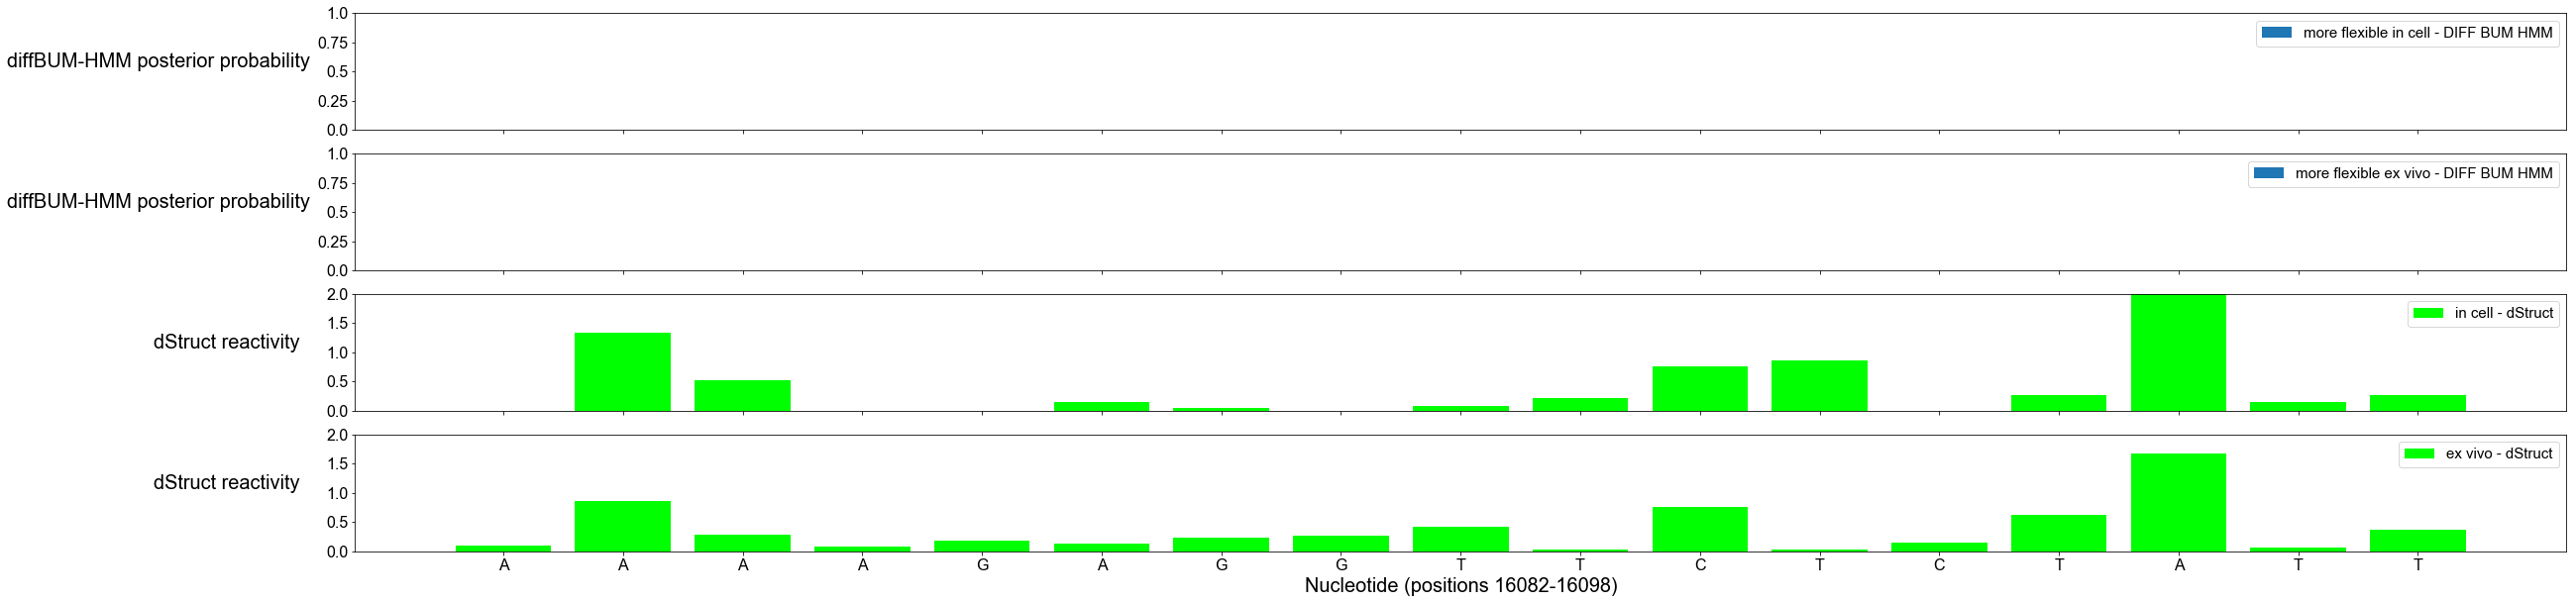

In [9]:
from matplotlib.ticker import LinearLocator

fig,ax = plt.subplots(4,sharex=True,figsize=[40,10])
x = new_df.index

for i in range(4):
    print(i)
    if i == 0:
        
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        print(y)
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        miny = 0
        maxy = 1
        yticks = np.arange(miny,maxy+1,0.25)
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('diffBUM-HMM posterior probability', rotation=0, fontsize=20, labelpad=160)
    
    elif i == 1:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        print(y)
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        miny = 0
        maxy = 1
        yticks = np.arange(miny,maxy+1,0.25)
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('diffBUM-HMM posterior probability', rotation=0, fontsize=20, labelpad=160)
        
    elif i == 2:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        print(y)
        ax[i].bar(x,y, color=(0.0,1.0,0.0))
        ax[i].set_xticklabels(x,fontsize=16)
        
        miny = 0
        maxy = 2
        yticks = np.arange(miny,maxy+1,0.5)
        #miny = 0
        #maxy = 3
        #yticks = np.arange(miny,maxy+1,0.25)
        
        #yticks = [0.0, 0.75,1.5,2.25,3.0]
        
        ax[i].set_ylim([0, 2])
        
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('dStruct reactivity', rotation=0, fontsize=20, labelpad=100)
    
    elif i == 3:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        print('Before normalization')
        print(y)
        ax[i].bar(x,y,color=(0.0,1.0,0.0))
        ax[i].set_xticklabels(x,fontsize=16)
   
        #This allows to normalize the plot in the same range as the one above 
    
        ax[i].set_ylim([0, 2])

        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=15)
        ax[i].set_ylabel('dStruct reactivity', rotation=0, fontsize=20, labelpad=100)
        ax[i].set_xlabel('Nucleotide (positions 16082-16098)', fontsize=20)


fig.savefig("diff_BUM_HMM_vs_dStruct_plot_Xist_16082_16098_threshold_0_05.pdf",dpi=400)   